In [11]:
import pandas as pd
import numpy as np


In [12]:
df = pd.read_csv("C:/Users/chvyb/Desktop/car_price_prediction/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


C:\Users\chvyb\AppData\Local\Temp\ipykernel_22796\3121071162.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

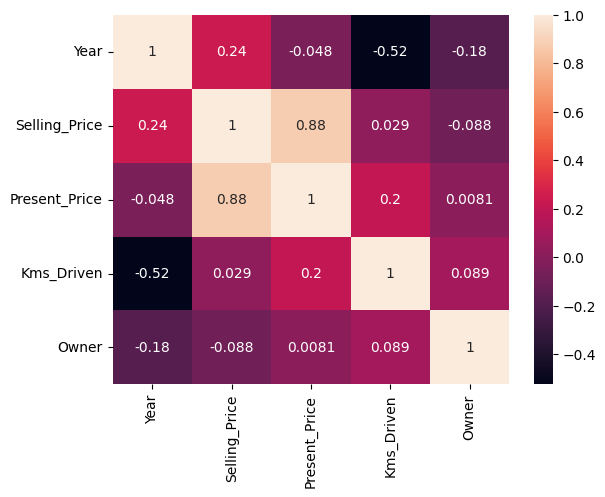

In [14]:

import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Car_Name

In [16]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [17]:
## one-hot encoding
df = pd.get_dummies(df,columns=["Car_Name"])

In [18]:
## Fuel_Type
df.Fuel_Type.value_counts()



Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [19]:
df.columns[0:9]

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_Name_800'],
      dtype='object')

In [20]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [21]:
## Label Encoding
df['Fuel_Type'].replace({"Diesel":0, "Petrol":1, "CNG":2},inplace=True)
df.Seller_Type.replace({"Individual" : 0 ,"Dealer":1 },inplace=True)
df.Transmission.replace({"Manual":0 , "Automatic":1},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 106 entries, Year to Car_Name_xcent
dtypes: float64(2), int64(6), uint8(98)
memory usage: 47.7 KB


In [23]:
## Model Trainig

x = df.drop("Selling_Price",axis=1)
y = df["Selling_Price"]

In [25]:
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

ModuleNotFoundError: No module named 'sklearn'

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.3,random_state=6)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 105), (91, 105), (210,), (91,))

In [16]:
car_model = LinearRegression()
car_model.fit(x_train,y_train)

LinearRegression()

In [17]:
def car_model_evalution(model,x,y):
    
    y_pred = model.predict(x)
    
    mse = mean_squared_error(y,y_pred)
    print(f"Mean Squared Error = {mse}")
    
    mae = mean_absolute_error(y,y_pred)
    print(f"Mean Abosolute Error = {mae}")
   
    r2 = r2_score(y,y_pred)
    print(f"r2 Score = {r2}")
    
    return "Success"

In [18]:
## Testing Data Evalution 

car_model_evalution(car_model,x_test,y_test)

Mean Squared Error = 6.1691217938343526
Mean Abosolute Error = 1.272833355821192
r2 Score = 0.7036532060897069


'Success'

In [19]:
## Training Data Evalution

car_model_evalution(car_model,x_train,y_train)

Mean Squared Error = 1.339513052670363
Mean Abosolute Error = 0.6676002225649383
r2 Score = 0.9519579613687337


'Success'

## Ridge and Lasso HyperParameter Tuning

In [20]:
## Ridge and Lasso HyperParameter Tuning
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import Lasso , Ridge


In [21]:
hyper = ({"alpha" : np.arange(0.0001 , 2, 0.01)})
lasso_model= Lasso()


In [22]:
gscv = GridSearchCV(lasso_model,hyper)
gscv.fit(x_train,y_train)

C:\Users\prran\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.964e+01, tolerance: 4.755e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\prran\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+02, tolerance: 5.161e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.0000e-04, 1.0100e-02, 2.0100e-02, 3.0100e-02, 4.0100e-02,
       5.0100e-02, 6.0100e-02, 7.0100e-02, 8.0100e-02, 9.0100e-02,
       1.0010e-01, 1.1010e-01, 1.2010e-01, 1.3010e-01, 1.4010e-01,
       1.5010e-01, 1.6010e-01, 1.7010e-01, 1.8010e-01, 1.9010e-01,
       2.0010e-01, 2.1010e-01, 2.2010e-01, 2.3010e-01, 2.4010e-01,
       2.5010e-01, 2.6010...
       1.6501e+00, 1.6601e+00, 1.6701e+00, 1.6801e+00, 1.6901e+00,
       1.7001e+00, 1.7101e+00, 1.7201e+00, 1.7301e+00, 1.7401e+00,
       1.7501e+00, 1.7601e+00, 1.7701e+00, 1.7801e+00, 1.7901e+00,
       1.8001e+00, 1.8101e+00, 1.8201e+00, 1.8301e+00, 1.8401e+00,
       1.8501e+00, 1.8601e+00, 1.8701e+00, 1.8801e+00, 1.8901e+00,
       1.9001e+00, 1.9101e+00, 1.9201e+00, 1.9301e+00, 1.9401e+00,
       1.9501e+00, 1.9601e+00, 1.9701e+00, 1.9801e+00, 1.9901e+00])})

In [23]:
gscv.best_estimator_

Lasso(alpha=0.040100000000000004)

In [24]:
lasso_model = Lasso(alpha=0.040100000000000004)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.040100000000000004)

In [25]:
# Training data Evaluation

car_model_evalution(lasso_model,x_train,y_train)

Mean Squared Error = 2.612643405847406
Mean Abosolute Error = 1.045666684316343
r2 Score = 0.9062967582262653


'Success'

In [26]:
# Testing data Evaluation


car_model_evalution(lasso_model,x_test,y_test)

Mean Squared Error = 3.003527410506791
Mean Abosolute Error = 1.1975054042045308
r2 Score = 0.8557192176988697


'Success'

## Ridge Model

In [27]:
ridge = Ridge()
hyper = ({"alpha" : np.arange(0.0001,2,0.1)})
gscv_ridge = GridSearchCV(ridge,hyper)
gscv_ridge.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.0000e-04, 1.0010e-01, 2.0010e-01, 3.0010e-01, 4.0010e-01,
       5.0010e-01, 6.0010e-01, 7.0010e-01, 8.0010e-01, 9.0010e-01,
       1.0001e+00, 1.1001e+00, 1.2001e+00, 1.3001e+00, 1.4001e+00,
       1.5001e+00, 1.6001e+00, 1.7001e+00, 1.8001e+00, 1.9001e+00])})

In [28]:
gscv_ridge.best_estimator_

Ridge(alpha=1.9001000000000001)

In [29]:
ridge = Ridge(alpha=1.9001000000000001)
ridge.fit(x_train,y_train)

Ridge(alpha=1.9001000000000001)

In [30]:
car_model_evalution(ridge,x_train,y_train)

Mean Squared Error = 1.8877811773428241
Mean Abosolute Error = 0.8562873236192393
r2 Score = 0.9322941601289496


'Success'

In [31]:
car_model_evalution(ridge,x_test,y_test)

Mean Squared Error = 3.2865314961644123
Mean Abosolute Error = 1.1619245001062
r2 Score = 0.8421245187691178


'Success'

# Conclusion :

## Lasso Model is the Best Model

In [ ]:
import pickle
# with open("Car_Pred_Model.pkl" ,"rb") as

with open("Car_Pred_Model.pkl","wb") as file:
    pickle.dump(lasso_model,file)

In [32]:
import json

In [ ]:
columns = {"column_names" : df.columns.to_list()}
with open("Column.json","w") as col_file:
    json.dump(columns,col_file)

In [ ]:
encoded_data = {
    "Fuel_Type" : {"Diesel":0, "Petrol":1, "CNG":2 },
    "Seller_Type" : {"Individual" : 0 ,"Dealer":1 },
    "Transmission" : {"Manual":0 , "Automatic":1}
}

with open("encoded_data","w") as enc_file:  # encoded_data.json
    json.dump(encoded_data,enc_file)